In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0)

In [26]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
# 9 Connecticut 
# 34 NJ
# 36 NY
# xxx=[]
# for col in 

Now check to see how large our subset df.

In [28]:
# your code here
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [29]:
df['PHYSHLTH'].describe()
#Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [30]:
# 1 - 30 Number of days
# 77 Don’t know/Not sure
# 88  None
# 99 Refused

phy_list = df.set_index(['_STATE', 'PHYSHLTH','FMONTH'])
phy_list
#.values_counts()  to look at types of columns

IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
_STATE PHYSHLTH FMONTH                                                       
9.0    88.0     5.0     5172017       5    17   2017    1200.0  2017000001   
                2.0     2142017       2    14   2017    1200.0  2017000002   
       2.0      1.0     1292017       1    29   2017    1200.0  2017000003   
       88.0     7.0     9112017       9    11   2017    1200.0  2017000004   
                5.0     7182017       7    18   2017    1200.0  2017000005   
...                         ...     ...   ...    ...       ...         ...   
36.0   88.0     5.0     5152017       5    15   2017    1200.0  2017012245   
                6.0     6252017       6    25   2017    1200.0  2017012246   
       6.0      7.0     7212017       7    21   2017    1200.0  2017012247   
       88.0     7.0     7202017       7    20   2017    1200.0  2017012248   
                7.0     7252017       7    25   2017    1200.0  2017012249   

                                _PSU  CTELENM1  PVTRESD1  COLGHOUS  ...  \
_STATE PHYSHLTH FMONTH                                              ...   
9.0    88.0     5.0     2.017000e+09       NaN       NaN       NaN  ...   
                2.0     2.017000e+09       NaN       NaN       NaN  ...   
       2.0      1.0     2.017000e+09       NaN       NaN       NaN  ...   
       88.0     7.0     2.017000e+09       NaN       NaN       NaN  ...   
                5.0     2.017000e+09       NaN       NaN       NaN  ...   
...                              ...       ...       ...       ...  ...   
36.0   88.0     5.0     2.017012e+09       NaN       NaN       NaN  ...   
                6.0     2.017012e+09       NaN       NaN       NaN  ...   
       6.0      7.0     2.017012e+09       NaN       NaN       NaN  ...   
       88.0     7.0     2.017012e+09       NaN       NaN       NaN  ...   
                7.0     2.017012e+09       NaN       NaN       NaN  ...   

                        _PA300R2  _PA30021  _PASTRNG  _PAREC1  _PASTAE1  \
_STATE PHYSHLTH FMONTH                                                    
9.0    88.0     5.0          2.0       2.0       2.0      4.0       2.0   
                2.0          1.0       1.0       1.0      1.0       1.0   
       2.0      1.0          3.0       2.0       1.0      3.0       2.0   
       88.0     7.0          2.0       2.0       2.0      2.0       2.0   
                5.0          2.0       2.0       1.0      1.0       1.0   
...                          ...       ...       ...      ...       ...   
36.0   88.0     5.0          3.0       2.0       2.0      4.0       2.0   
                6.0          2.0       2.0       2.0      4.0       2.0   
       6.0      7.0          2.0       2.0       2.0      4.0       2.0   
       88.0     7.0          9.0       9.0       9.0      9.0       9.0   
                7.0          3.0       2.0       2.0      4.0       2.0   

                        _RFSEAT2  _RFSEAT3  _FLSHOT6  _PNEUMO2  _AIDTST3  
_STATE PHYSHLTH FMONTH                                                    
9.0    88.0     5.0          1.0       1.0       NaN       NaN       1.0  
                2.0          2.0       2.0       NaN       NaN       2.0  
       2.0      1.0          1.0       1.0       NaN       NaN       2.0  
       88.0     7.0          1.0       1.0       NaN       NaN       1.0  
                5.0          1.0       1.0       NaN       NaN       2.0  
...                          ...       ...       ...       ...       ...  
36.0   88.0     5.0          1.0       1.0       NaN       NaN       1.0  
                6.0          1.0       1.0       NaN       NaN       1.0  
       6.0      7.0          1.0       1.0       NaN       NaN       1.0  
       88.0     7.0          9.0       9.0       9.0       9.0       9.0  
                7.0          1.0       1.0       NaN       NaN       1.0  

[34545 rows x 355 columns]

In [33]:
# 1) How does health status, represented by average number of days with bad physical health in the past month 
# (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
# 2) Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous 
# illness, etc.)? Recommend how your findings could be used to target different groups of people with different 
# insurance products.
# To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) found in the zip folder.

# pd.set_option('display.max_columns', 400)

df['PHYSHLTH'].replace(88.0,0,inplace=True)
df['PHYSHLTH'].replace([77,99],inplace=True)
df['_STATE'].replace([9],'Connecticut',inplace=True)
df['_STATE'].replace([34],'New Jersey',inplace=True)
df['_STATE'].replace([36],'New York',inplace=True)

In [34]:
stats = df.groupby('_STATE')['PHYSHLTH'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
Connecticut,10588.0,3.696732,8.114238,0.0,0.0,0.0,2.0,30.0
New Jersey,11708.0,4.366502,8.916985,0.0,0.0,0.0,3.0,30.0
New York,12249.0,4.145073,8.439333,0.0,0.0,0.0,3.0,30.0


In [ ]:
# lambda x:
# lambda x: x.str.replace())
# .apply(.replace())

# df.is

# df.loc[(df['_STATE']=='Connecticut')]
# df.loc[(df['_STATE']=='Connecticut') & (df['PHYSHLTH']==np.nan)]

In [40]:
# for state in list(ph['STATE'].unique()):
#     ph.loc[(ph)['STATE'] == '{}'.format(state)) & (ph['PHYSHLTH'] == 99), 'PHYSHLTH'] = float(ph_subset.groupby('_STATE').mean().loc['{}'.format(state)])

SyntaxError: invalid syntax (<ipython-input-40-1c5f9f20e34d>, line 2)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

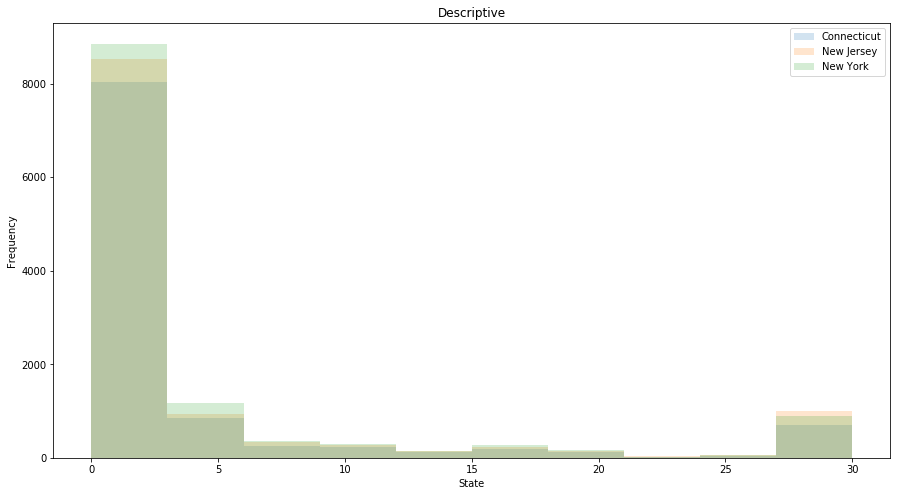

In [39]:
df.groupby(['_STATE'])['PHYSHLTH'].plot(kind='hist', alpha=0.2, figsize=(15,8))
plt.title('Descriptive Statistics')
plt.xlabel("Days Unhealthy")
plt.legend()
plt.show()

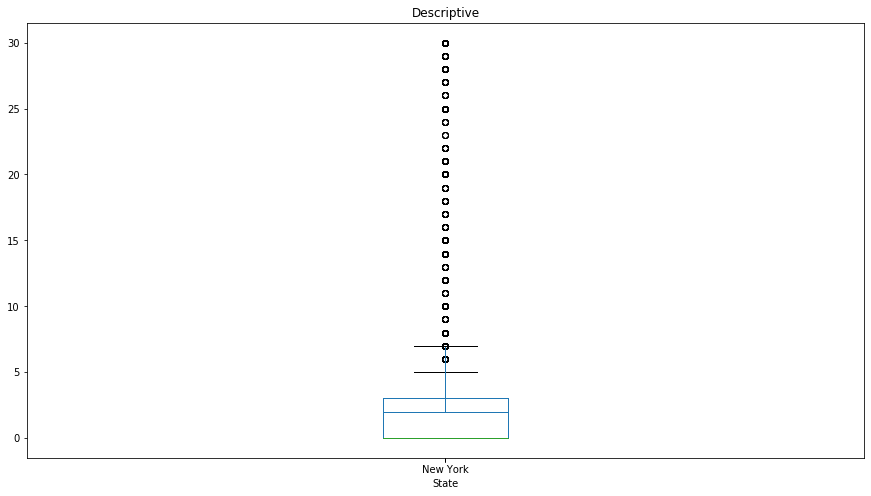

In [30]:
# graphic showing those descriptive stats

df.groupby(['_STATE'])['PHYSHLTH'].plot(kind='box', figsize=(15,8))
plt.title('Descriptive')
plt.xlabel("State")
plt.show()

In [ ]:
# graphic showing the distribution of data

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [ ]:
# code to calculate the average number of sick days by state

In [ ]:
# code to graph those averages using matplotlib

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [ ]:
# code to create new colum for chronically sick

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [ ]:
# code to calculate averages per state

In [ ]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  